# Data Science Capstone II

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Understanding-Data" data-toc-modified-id="Understanding-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Understanding Data</a></span></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Cleaning</a></span></li><li><span><a href="#EDA-and-Visualization" data-toc-modified-id="EDA-and-Visualization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA and Visualization</a></span></li><li><span><a href="#Data-Preprocessing-and-Modeling" data-toc-modified-id="Data-Preprocessing-and-Modeling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Preprocessing and Modeling</a></span><ul class="toc-item"><li><span><a href="#Scale-the-data" data-toc-modified-id="Scale-the-data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Scale the data</a></span></li><li><span><a href="#Train-Linear-Regression-model" data-toc-modified-id="Train-Linear-Regression-model-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Train Linear Regression model</a></span></li><li><span><a href="#Make-predictions-using-the-model-on-both-train-and-test-splits" data-toc-modified-id="Make-predictions-using-the-model-on-both-train-and-test-splits-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Make predictions using the model on both train and test splits</a></span></li><li><span><a href="#Assess-model-performance" data-toc-modified-id="Assess-model-performance-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Assess model performance</a></span></li><li><span><a href="#Create-pipeline-with-LR" data-toc-modified-id="Create-pipeline-with-LR-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Create pipeline with LR</a></span></li><li><span><a href="#Evaluate-the-LR-pipeline" data-toc-modified-id="Evaluate-the-LR-pipeline-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Evaluate the LR pipeline</a></span></li><li><span><a href="#Choose-the-best-K" data-toc-modified-id="Choose-the-best-K-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Choose the best K</a></span></li><li><span><a href="#LR-Feature-selection" data-toc-modified-id="LR-Feature-selection-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>LR Feature selection</a></span></li><li><span><a href="#Random-Forest-Model" data-toc-modified-id="Random-Forest-Model-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>Random Forest Model</a></span></li><li><span><a href="#Evaluate-RF" data-toc-modified-id="Evaluate-RF-4.10"><span class="toc-item-num">4.10&nbsp;&nbsp;</span>Evaluate RF</a></span></li><li><span><a href="#Hypertune-the-parameters" data-toc-modified-id="Hypertune-the-parameters-4.11"><span class="toc-item-num">4.11&nbsp;&nbsp;</span>Hypertune the parameters</a></span></li><li><span><a href="#Feature-selection-with-RF" data-toc-modified-id="Feature-selection-with-RF-4.12"><span class="toc-item-num">4.12&nbsp;&nbsp;</span>Feature selection with RF</a></span></li><li><span><a href="#MAE-for-both-models" data-toc-modified-id="MAE-for-both-models-4.13"><span class="toc-item-num">4.13&nbsp;&nbsp;</span>MAE for both models</a></span></li><li><span><a href="#Checking-for-more-data" data-toc-modified-id="Checking-for-more-data-4.14"><span class="toc-item-num">4.14&nbsp;&nbsp;</span>Checking for more data</a></span></li><li><span><a href="#Saving-the-best-model" data-toc-modified-id="Saving-the-best-model-4.15"><span class="toc-item-num">4.15&nbsp;&nbsp;</span>Saving the best model</a></span></li></ul></li></ul></div>

## Understanding Data

 - datetime: Date on which the other values were recorded.
 - season: Season (1:winter, 2:spring, 3:summer, 4:fall).
 - holiday: whether day is holiday or not
 - workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
 - weather: Weather conditions (1: Clear, Few clouds, Partly cloudy, Partly cloudy, 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds, 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
 - temp: The true temperature on that day
 - atemp: The feeling temperature on that day
 - humidity: Humidity on that day
 - windspeed: The Windspeed on that day
 - casual: Count of casual users
 - registered: Count of registered users
 - count: Total users

## Data Cleaning 

In [40]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 101)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression
import pickle
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_validate, GridSearchCV, learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

In [2]:
# reading data with a timestamp transforming it into datetime type, 
# and setting it as index in both sets
data = pd.read_csv("train.csv",parse_dates=['datetime'], index_col=0)
data_test = pd.read_csv('test.csv',parse_dates=['datetime'], index_col=0)


In [3]:
data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
 # Our target feature is 'count' - a numerical variable

In [5]:
#Explore columns
data.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [6]:
#Description
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


 - There are about twice as much registered compared to casual users. 
 - There is much more rentals on work days compared to holidays.
 - Most rentals occur when the weather is dry, around 20 degrees C, wind around 12mph

In [7]:
 #Info
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1020.6 KB


In [8]:
data.isnull().values.any()


False

In [9]:
# extracting parts of datetime and creating new features in both sets of data
def add_features(data):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour

In [10]:
add_features(data)
add_features(data_test)
data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,5,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,5,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,5,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,5,4


In [11]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,9.992559,3.013963,11.541613
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,5.476608,2.004585,6.915838
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,5.000000,1.000000,6.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,10.000000,3.000000,12.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,15.000000,5.000000,18.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,19.000000,6.000000,23.000000


## EDA and Visualization

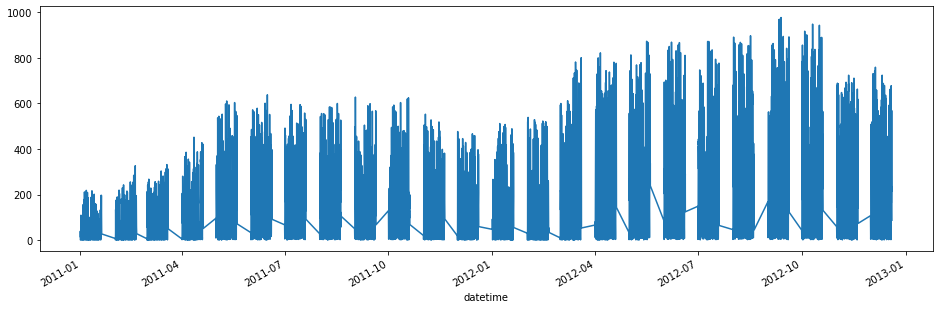

In [12]:
plt.figure(figsize=(16,5))
data['count'].plot()
plt.show()

As expected, number of rentals grows over the summer and peaks in the fall.

/var/folders/cm/9dfbj1d120jdng2k7fghmx0r0000gn/T/ipykernel_53416/2130912467.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data['2012-07-01']['count'].plot()


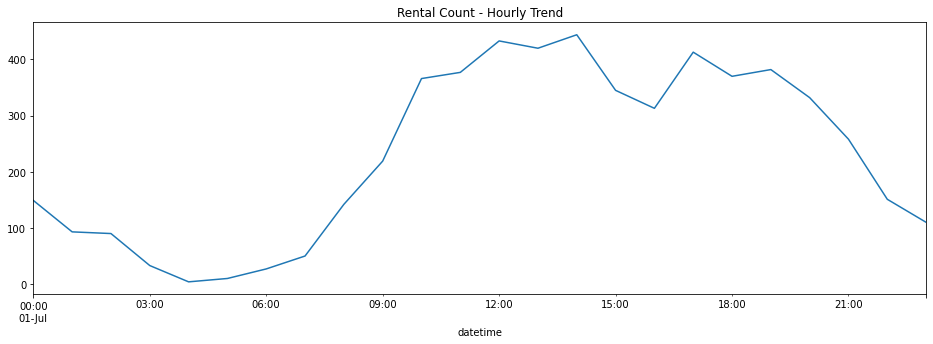

In [13]:
plt.figure(figsize=(16,5))
plt.title('Rental Count - Hourly Trend')
data['2012-07-01']['count'].plot()
plt.show()

One of the busiest months, July, and hourly trend shows that people rent bikes the most between 11am and 2pm, with a relatively small decline until 5pm, then climbing again until 7pm, going down from there.


/var/folders/cm/9dfbj1d120jdng2k7fghmx0r0000gn/T/ipykernel_53416/1277611284.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data['2012-07']['count'].plot()


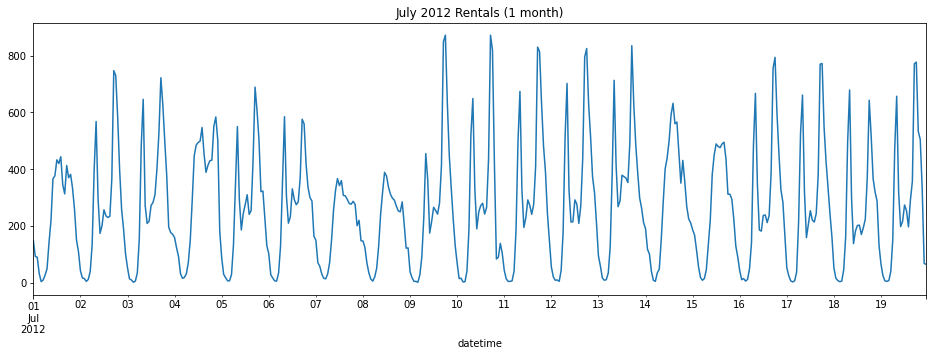

In [14]:
plt.figure(figsize=(16,5))
plt.title('July 2012 Rentals (1 month)')
data['2012-07']['count'].plot()
plt.show()

A close-up of month July shows slight seasonality every 5 days, possibly means slowing down over the weekend.

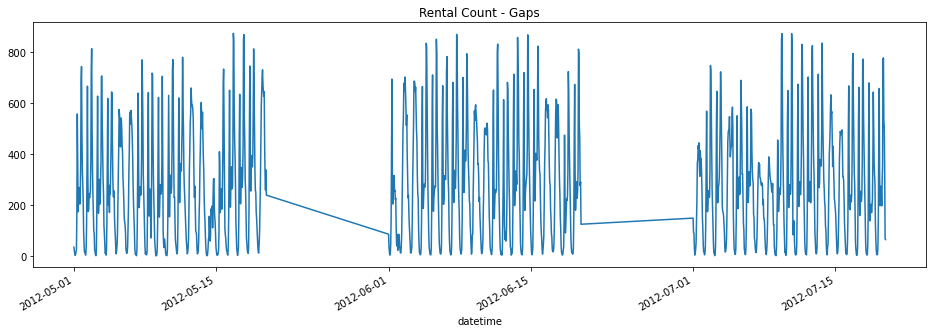

In [15]:
plt.figure(figsize=(16,5))
plt.title('Rental Count - Gaps')
data['2012-05':'2012-07']['count'].plot()
plt.show()


Our data has gaps between every 20th and last day of the month, and the above is a close-up.

/var/folders/cm/9dfbj1d120jdng2k7fghmx0r0000gn/T/ipykernel_53416/2059017482.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(data['2011']['count'],label='2011')
/var/folders/cm/9dfbj1d120jdng2k7fghmx0r0000gn/T/ipykernel_53416/2059017482.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(data['2012']['count'],label='2012')


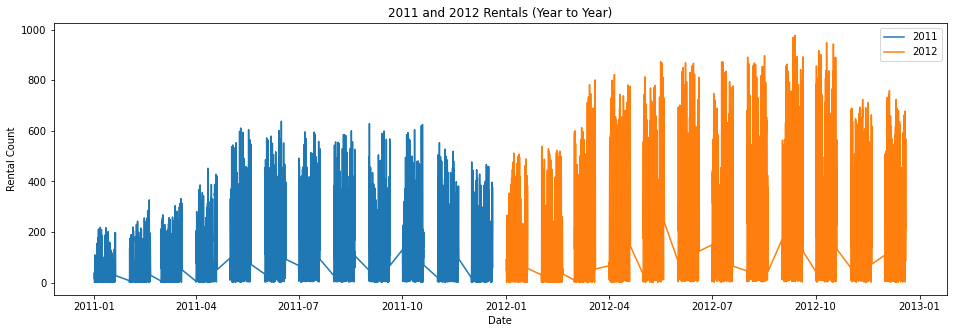

In [16]:
plt.figure(figsize=(16,5))
plt.plot(data['2011']['count'],label='2011')
plt.plot(data['2012']['count'],label='2012')
plt.title('2011 and 2012 Rentals (Year to Year)')
plt.xlabel('Date')
plt.ylabel('Rental Count')
plt.legend()
plt.show()

Year to year comparison shows significant growing trend over time, and similar distribution over the months in a year.

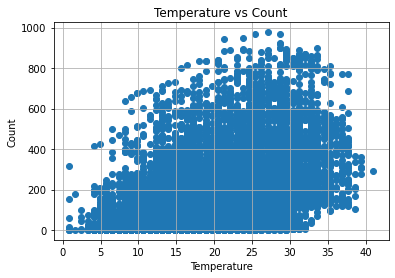

In [17]:
plt.scatter(x=data.temp,y=data["count"])
plt.grid(True)
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Temperature vs Count')
plt.show()

Looks like the largest counts are between 20-30 degrees Celsius, and in general higher temperature means more rentals, up until 35 degrees.

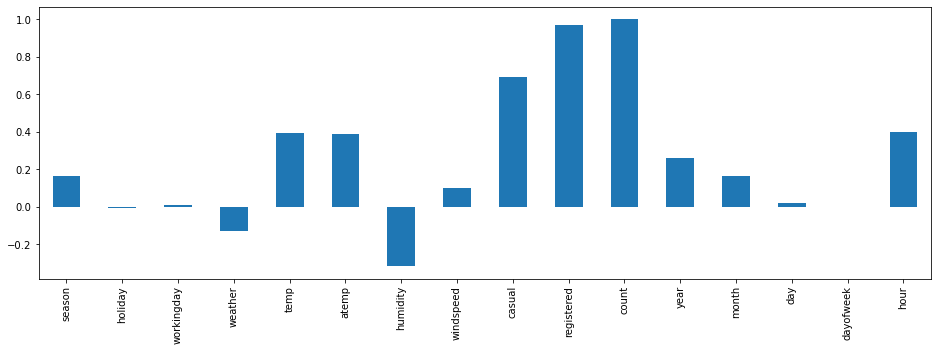

In [18]:
    plt.figure(figsize=(16,5))
    data.corr()['count'].plot(kind='bar')
    plt.show()

Highest positive correlation is between our target and registered users, which will impact our prediction model in a wrong way, so we will drop them. We are left with temperature and hour with the highest correlation. Humidity affects our target negatively, meaning higher humidity leads to less rentals (probably due to rain).

In [19]:
data.drop(columns=['casual','registered'], inplace=True)

## Data Preprocessing and Modeling

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='count'), data['count'], test_size=0.3, 
                                                    random_state=47)

In [21]:
#Calculate the mean of `y_train`
train_mean = y_train.mean()
train_mean

190.31719160104987

Just guessing a mean count for hourly rental demand gives the above value. 

### Scale the data

In [22]:
scaler = StandardScaler()
scaler.fit(X_train)
X_tr_scaled = scaler.transform(X_train)
X_te_scaled = scaler.transform(X_test)

### Train Linear Regression model

In [23]:
lm = LinearRegression().fit(X_tr_scaled, y_train)

### Make predictions using the model on both train and test splits

In [28]:
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)
y_tr_pred

array([161.06655483, 196.50830333, 159.73933263, ..., 302.77853247,
        13.93997631,  -3.84288192])

In [29]:
y_te_pred

array([357.04247062, 232.19730422, -19.78977712, ...,  54.62377574,
       250.60351718, 297.23473861])

### Assess model performance

In [25]:
median_r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
median_r2

(0.4016278146347573, 0.36110440513858355)

In [26]:
median_mae = mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)
median_mae

(103.98890541560452, 109.89987860705348)

In [27]:
median_mse = mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)
median_mse

(19282.396384937478, 21827.33441533706)

### Create pipeline with LR

In [33]:
pipe = make_pipeline( 
    StandardScaler(),
    SelectKBest(f_regression),
    LinearRegression()
)

In [34]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(score_func=<function f_regression at 0x7f98f1636280>)),
                ('linearregression', LinearRegression())])

### Evaluate the LR pipeline

In [35]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [36]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.4014786686502031, 0.36143192720408357)

In [37]:
cv_results = cross_validate(pipe, X_train, y_train, cv=5)

In [38]:
cv_scores = cv_results['test_score']
cv_scores

array([0.4186341 , 0.39034074, 0.39917283, 0.3994456 , 0.39277011])

In [41]:
np.mean(cv_scores), np.std(cv_scores)

(0.4000726749960674, 0.009937477070437175)

In [42]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'selectkbest', 'linearregression', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'selectkbest__k', 'selectkbest__score_func', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize', 'linearregression__positive'])

### Choose the best K

In [43]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

In [44]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [45]:
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x7f98f1636280>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13]})

In [46]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [47]:
lr_grid_cv.best_params_

{'selectkbest__k': 11}

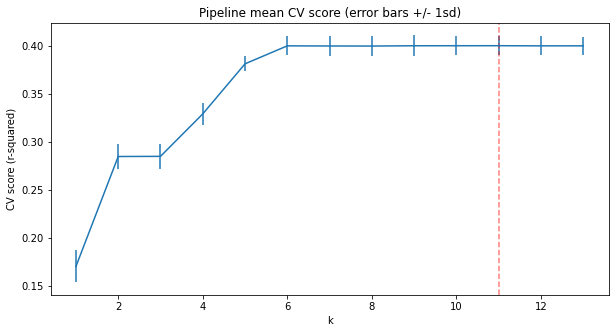

In [48]:
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

The best K is 6.

In [49]:
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()

### LR Feature selection

In [50]:
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending=False)

hour         55.906530
atemp        41.595752
year         41.224821
month        33.389449
temp          9.599761
windspeed     4.191408
day           2.768528
holiday      -0.921197
weather      -2.436207
season       -7.439409
humidity    -39.544382
dtype: float64

### Random Forest Model

In [51]:
RF_pipe = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

### Evaluate RF

In [52]:
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5)

In [53]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.93824394, 0.94043814, 0.93835457, 0.93957387, 0.94555432])

In [54]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.9404329666485381, 0.002686183161209933)

### Hypertune the parameters

In [55]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None]
}
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None]}

In [56]:
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [57]:
rf_grid_cv.fit(X_train, y_train)

/Users/majapedigo/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000],
                         'standardscaler': [StandardScaler(), None]})

In [58]:
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 1000, 'standardscaler': None}

Looks like 1000 trees will be the best, and standardscaler didn't make a difference.

In [59]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.94171693, 0.94211646, 0.93858236, 0.94168897, 0.94716782])

In [60]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.942254507816215, 0.0027659797145707064)

### Feature selection with RF

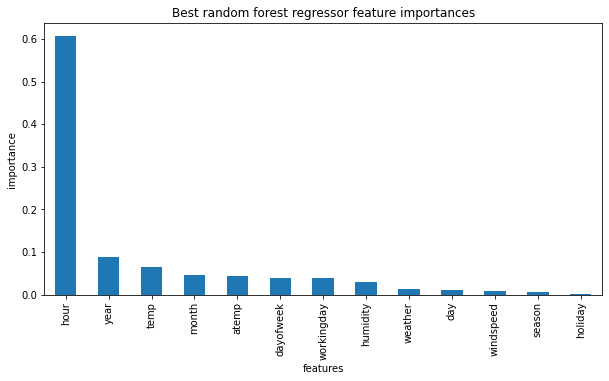

In [61]:
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

Key features are:
   - Hour
   - Year
   - temp

### MAE for both models

In [62]:
lr_neg_mae = cross_validate(lr_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [63]:
lr_mae_mean = np.mean(-1 * lr_neg_mae['test_score'])
lr_mae_std = np.std(-1 * lr_neg_mae['test_score'])
lr_mae_mean, lr_mae_std

(104.2838400213434, 2.3225252647189)

In [64]:
mean_absolute_error(y_test, lr_grid_cv.best_estimator_.predict(X_test))

109.99133446419111

In [65]:
rf_neg_mae = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [66]:
rf_mae_mean = np.mean(-1 * rf_neg_mae['test_score'])
rf_mae_std = np.std(-1 * rf_neg_mae['test_score'])
rf_mae_mean, rf_mae_std

(26.915209580052487, 0.6833652958553569)

In [67]:
mean_absolute_error(y_test, rf_grid_cv.best_estimator_.predict(X_test))

25.590727801592166

### Checking for more data

In [68]:
fractions = [.2, .25, .3, .35, .4, .45, .5, .6, .75, .8, 1.0]
train_size, train_scores, test_scores = learning_curve(pipe, X_train, y_train, train_sizes=fractions)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

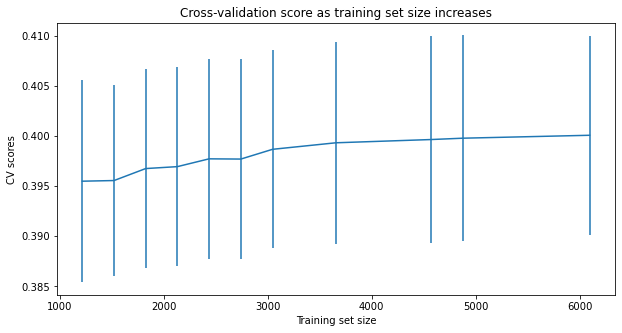

In [69]:
plt.subplots(figsize=(10, 5))
plt.errorbar(train_size, test_scores_mean, yerr=test_scores_std)
plt.xlabel('Training set size')
plt.ylabel('CV scores')
plt.title('Cross-validation score as training set size increases');

There is a slight increase with more data.

### Saving the best model

In [70]:
best_model = rf_grid_cv.best_estimator_
best_model.version = '1.0'
best_model.pandas_version = pd.__version__
best_model.numpy_version = np.__version__
best_model.sklearn_version = sklearn_version
best_model.X_columns = [col for col in X_train.columns]
best_model.build_datetime = datetime.datetime.now()

In [71]:
best_model

Pipeline(steps=[('standardscaler', None),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=1000, random_state=47))])

In [73]:
Pkl_Filename = "Pickle_RF_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(best_model, file)